# Información relevante de la base de datos
Según la fuente de información que publicó dicha base de datos (https://archive.ics.uci.edu/ml/datasets/online+retail), esta corresponde  aun conjunto de transacciones ocurridas entre el 01-12-2010 y 09-12-2011 para un comercio minorista en línea con sede en Reino Unido. <br>
La base de datos está compuesta por las siguientes columnas:
- InvoiceNo: número de factura. Es un valor numérico de 6 dígitos asignado de forma exclusiva para cada transacción. Si el código comienza con una letra "c", corresponde a una cancelación.
- StockCode: código de producto o artículo. Es un valor numérico de 5 dígitos asociado a cada producto.
- Description: descripción del producto.
- Quantity: corresponde a un valor númerico, que representa la cantidad de cada producto o artículo por transacción.
- InvoiceDate: fecha y hora de la factura. 
- UnitPrice: valor numérico correspondiente al precio unitario en libras esterlinas.
- CustomerID: valor numérico de 5 dígitos asignado de forma exclusiva a cada cliente.
- Country: nombre del país. <br>

In [75]:
# Librerias necesarias
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
import datetime as dt

from scipy import stats #para estandarizar los datos
from scipy.spatial import distance_matrix #calculo de la matriz de distancia
from sklearn.cluster import KMeans #calculo del cluster k-media

# Configuracion de pandas para que no bloque asignaciones masivas
pd.options.mode.chained_assignment = None

# Configuracion para que se muestren los graficos plotly en modo offline
pyo.init_notebook_mode()

## Lectura del set de datos

In [77]:
df = pd.read_excel("data/Online Retail.xlsx")
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

## Descripción superficial de la base de datos

In [78]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [79]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(541909, 8)
Tipo de variable de las columnas:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
Cantidad de valores nulos por columna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Descripción de los campos de tipo texto:
- palabra más corta
- palabra más larga
- número promedio de carácteres

In [80]:
# Funcion para obtener la mayor y menor cantidad de carácteres y la cantidad promedio de carácteres
def LargoCadena(lista):
    # Acumuladores y registros para las variables a determinar
    _min = 0
    _palabraMin = ""
    _max = 0
    _palabraMax = ""
    _i = 0
    _suma = 0
    _promedio = 0
    
    for e in lista:
        if(e is not np.nan):# elemento no nulo
            elem = str(e)
            if(_i == 0):# Primer registro
                _min = len(elem.strip())
                _max = len(elem.strip())
                _palabraMin = elem.strip()
                _palabraMax = elem.strip()
                
            # Acumulador de sumas para calcular promedio posterior
            _suma = _suma + len(elem.strip())
            
            # Re asignacion para largos maximo y minimo 
            if(len(elem.strip()) < _min):
                _min = len(elem.strip())
                _palabraMin = elem.strip()
                
            if(len(elem.strip()) > _max):
                _max = len(elem.strip())
                _palabraMax = elem.strip()
            
            # Contador para el calculo de promedio
            _i = _i + 1
            
    # Calculo del promedio fuera del bucle for
    if(_i != 0):
        _promedio = _suma / _i
    else:
        _promedio = 0
    
    # Se muestra un breve reporte con la informacion
    print("====================================================================")
    print("Palabra más larga:")
    print(_palabraMax)
    print("Número de carácteres:")
    print(_max)
    print("====================================================================")
    print("Palabra más corta:")
    print(_palabraMin)
    print("Número de carácteres:")
    print(_min)
    print("====================================================================")
    print("Cantidad promedio de carácteres:")
    print(int(_promedio))
    print("Número de palabras evaluadas:")
    print(_i)

In [81]:
print("====================================================================")
print("VARIABLE: Description")
LargoCadena(df["Description"])
print("====================================================================")
print("VARIABLE: Country")
LargoCadena(df["Country"])

VARIABLE: Description
Palabra más larga:
KNITTED UNION FLAG HOT WATER BOTTLE
Número de carácteres:
35
Palabra más corta:
?
Número de carácteres:
1
Cantidad promedio de carácteres:
26
Número de palabras evaluadas:
540455
VARIABLE: Country
Palabra más larga:
United Arab Emirates
Número de carácteres:
20
Palabra más corta:
USA
Número de carácteres:
3
Cantidad promedio de carácteres:
13
Número de palabras evaluadas:
541909


## Datos perdidos

In [82]:
# Funcion para obtener la cantida de datos no nulos por cada columna
def NoNulos(campo):
    n = df.shape[0]
    nulos = df[campo].isnull().sum()
    return n - nulos

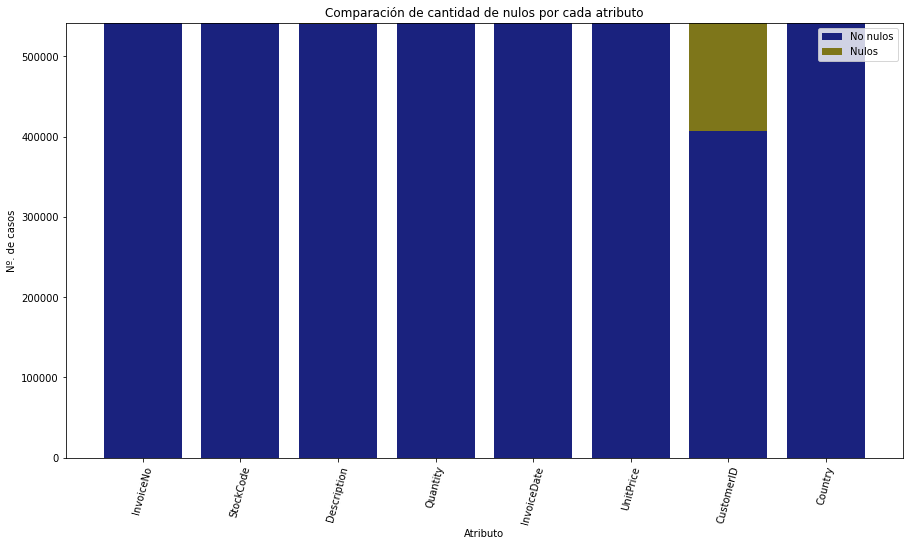

In [83]:
total_registros = df.shape[0]
data = [
    ["InvoiceNo", df["InvoiceNo"].isnull().sum(), NoNulos("InvoiceNo")],
    ["StockCode", df["StockCode"].isnull().sum(), NoNulos("StockCode")],
    ["Description", df["Description"].isnull().sum(), NoNulos("Description")],
    ["Quantity", df["Quantity"].isnull().sum(), NoNulos("Quantity")],
    ["InvoiceDate", df["InvoiceDate"].isnull().sum(), NoNulos("InvoiceDate")],
    ["UnitPrice", df["UnitPrice"].isnull().sum(), NoNulos("UnitPrice")],
    ["CustomerID", df["CustomerID"].isnull().sum(), NoNulos("CustomerID")],
    ["Country", df["Country"].isnull().sum(), NoNulos("Country")]
]
df2 = pd.DataFrame(data, columns = ["attribute", "null_count", "notnull_count"])
df2 = df2.set_index("attribute")

null_values = df2["null_count"]
not_nullvalues = df2["notnull_count"]

plt.figure(figsize=(15,8))
plt.bar(df2.index, not_nullvalues, label='No nulos', color= "#1a227e")
plt.bar(df2.index, null_values, color='#7e761a', label='Nulos', bottom=not_nullvalues)
plt.xlabel('Atributo')
plt.xticks(rotation = 75)
plt.ylabel('Nº. de casos')
plt.title('Comparación de cantidad de nulos por cada atributo')
plt.legend(loc = "best")
plt.show()

Se puede apreciar que el volumen de datos nulos no es tan elevado comparado con el total del dataset, por lo que se puede aplicar la eliminación de todos los nulos sin mayor problema.

In [84]:
#Se copian los datos a un dataset de copia para no perder los datos originales
data = df.copy()
#Sobre este set copia, se aplica la eliminacion de datos nulos
data = data.dropna()
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[406829 rows x 8 columns]

## Descripción superficial de la nueva base de datos

In [85]:
data.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [86]:
print("===================================================================")
print("Tamaño del dataframe:")
print(data.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(data.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(data.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(406829, 8)
Tipo de variable de las columnas:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object
Cantidad de valores nulos por columna:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Se convierten los tipos de variables que corresponen y se añaden algunas columnas para tener mayor información.

In [87]:
# se castean las variables a los tipos que les corresponda
data['CustomerID'] = data['CustomerID'].astype("int64")
data['Description'] = data['Description'].astype("string")
data['Country'] = data['Country'].astype("string")

In [88]:
# Se agrega una columna para la cantidad gastada = cantidad por el precio unitario
data["Amount_Spent"] = data['Quantity'] * data['UnitPrice'] 
data = data[['InvoiceNo','InvoiceDate','StockCode','Description','Quantity','UnitPrice','Amount_Spent','CustomerID','Country']]

Se convierten los tipos de variables que corresponden y se añaden las siguientes variables:
- Numero del mes
- Numero del año
- Numero del cuatrimestre
- Número de la semana del año
- Número del nombre del día (lunes = 0)
- Número del día
- Nombre del día en inglés
- Fecha en formato yyyy-MM-dd
- Concatenacion mes-año
- Número de la hora

In [89]:
# Se separa la fecha en nuevas columnas para obtener con mayor detalle la data asociada
data["Month"] = data.InvoiceDate.dt.month # Columna con el numero del mes
data["Year"] = data.InvoiceDate.dt.year # Columna con el numero del año
data["Quarter"] = data.InvoiceDate.dt.quarter # Columna con el número del cuarto de año
data["Semana"] = data.InvoiceDate.dt.week # Columna con el numero de la semana del año
data["DiaSemana"] = data.InvoiceDate.dt.weekday # Columna con el numero del nombre del dia (lunes = 0)
data["Dia"] = data.InvoiceDate.dt.day # Columna con el numero del dia
data['NombreDia'] = data.InvoiceDate.dt.day_name() # Columna con el nombre del dia
data['Date']= pd.DatetimeIndex(data.InvoiceDate).date # Columna con solo la fecha (yyyy-MM-dd)
data["Yearmonth"] = data['InvoiceDate'].apply(lambda x: f"{x.year}-{x.month}" if(x.month > 9) else f"{x.year}-0{x.month}") # Columna de concatenacion de mes y año (para diferenciar los meses entre años)
data['Hour'] = data['InvoiceDate'].apply(lambda x: x.strftime('%H')) # Columna con el numero de la hora

data.head()

<ipython-input-89-c2c8e1b8df21>:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



InvoiceNo         InvoiceDate StockCode  \
0    536365 2010-12-01 08:26:00    85123A   
1    536365 2010-12-01 08:26:00     71053   
2    536365 2010-12-01 08:26:00    84406B   
3    536365 2010-12-01 08:26:00    84029G   
4    536365 2010-12-01 08:26:00    84029E   

                           Description  Quantity  UnitPrice  Amount_Spent  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55         15.30   
1                  WHITE METAL LANTERN         6       3.39         20.34   
2       CREAM CUPID HEARTS COAT HANGER         8       2.75         22.00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39         20.34   
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39         20.34   

   CustomerID         Country  Month  Year  Quarter  Semana  DiaSemana  Dia  \
0       17850  United Kingdom     12  2010        4      48          2    1   
1       17850  United Kingdom     12  2010        4      48          2    1   
2       17850  United Kingdom     12  2010        4      48          2    1   
3       17850  United Kingdom     12  2010        4      48          2    1   
4       17850  United Kingdom     12  2010        4      48          2    1   

   NombreDia        Date Yearmonth Hour  
0  Wednesday  2010-12-01   2010-12   08  
1  Wednesday  2010-12-01   2010-12   08  
2  Wednesday  2010-12-01   2010-12   08  
3  Wednesday  2010-12-01   2010-12   08  
4  Wednesday  2010-12-01   2010-12   08

La base de datos está compuesta por las siguientes columnas:
- InvoiceNo: número de factura. Es un valor numérico de 6 dígitos asignado de forma exclusiva para cada transacción. Si el código comienza con una letra "c", corresponde a una cancelación.
- StockCode: código de producto o artículo. Es un valor numérico de 5 dígitos asociado a cada producto.
- Description: descripción del producto.
- Quantity: corresponde a un valor númerico, que representa la cantidad de cada producto o artículo por transacción.
- InvoiceDate: fecha y hora de la factura. 
- UnitPrice: valor numérico correspondiente al precio unitario en libras esterlinas.
- CustomerID: valor numérico de 5 dígitos asignado de forma exclusiva a cada cliente.
- Country: nombre del país. <br>

A parte de estos campos que trae el dataset o base de datos, se añadieron otras columnas, las cuales son:
- Amount_Spent: total gastado, el producto entre el precio unitario y la cantidad.
- Month: el mes de la factura.
- Year: el año de la factura.
- Quarter: qué cuarto del año corresponde.
- Semana: número de la semana del año que corresponde.
- DiaSemana: día de la semana (Lunes = 0, Martes = 1, ..., Sábado = 5 y Domingo = 6).
- Dia: número del día del mes.
- NombreDia: nombre del día de la semana.
- Date: fecha en formato _yyyy-MM-dd_.
- yearmonth: concatenación de número de mes y año en formato _yyyy-MM_.
- Hour: hora extraída a partir de la fecha de compra.

<hr>

## Lista de productos favoritos comprados por los clientes
Primero se extraen del total de registros del data set, aquellos que no correspondan a devoluciones o cancelaciones de compras, esta regla se cumple cuando la variable del número de factura (InvoiceNo) no contiene una letra C. Posterior a esto, se agrupa por descripción de producto y se cuenta la cantidad de éstos que están repetidos, se suman las cantidades compradas en transacciones por cada caso y se suman los costos totales por cada caso en transacciones, para finalmente elegir el TOP 10 por cada uno.

In [90]:
df_compras = data[~(data.InvoiceNo.str.contains("C") == True)]
df_compras.head()

InvoiceNo         InvoiceDate StockCode  \
0    536365 2010-12-01 08:26:00    85123A   
1    536365 2010-12-01 08:26:00     71053   
2    536365 2010-12-01 08:26:00    84406B   
3    536365 2010-12-01 08:26:00    84029G   
4    536365 2010-12-01 08:26:00    84029E   

                           Description  Quantity  UnitPrice  Amount_Spent  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55         15.30   
1                  WHITE METAL LANTERN         6       3.39         20.34   
2       CREAM CUPID HEARTS COAT HANGER         8       2.75         22.00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39         20.34   
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39         20.34   

   CustomerID         Country  Month  Year  Quarter  Semana  DiaSemana  Dia  \
0       17850  United Kingdom     12  2010        4      48          2    1   
1       17850  United Kingdom     12  2010        4      48          2    1   
2       17850  United Kingdom     12  2010        4      48          2    1   
3       17850  United Kingdom     12  2010        4      48          2    1   
4       17850  United Kingdom     12  2010        4      48          2    1   

   NombreDia        Date Yearmonth Hour  
0  Wednesday  2010-12-01   2010-12   08  
1  Wednesday  2010-12-01   2010-12   08  
2  Wednesday  2010-12-01   2010-12   08  
3  Wednesday  2010-12-01   2010-12   08  
4  Wednesday  2010-12-01   2010-12   08

In [91]:
df_compras.describe()

Quantity      UnitPrice   Amount_Spent     CustomerID  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean       13.021823       3.116174      22.394749   15294.315171   
std       180.420210      22.096788     309.055588    1713.169877   
min         1.000000       0.000000       0.000000   12346.000000   
25%         2.000000       1.250000       4.680000   13969.000000   
50%         6.000000       1.950000      11.800000   15159.000000   
75%        12.000000       3.750000      19.800000   16795.000000   
max     80995.000000    8142.750000  168469.600000   18287.000000   

               Month           Year        Quarter         Semana  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean        7.612537    2010.934259       2.856106      30.964629   
std         3.416527       0.247829       1.121873      14.755880   
min         1.000000    2010.000000       1.000000       1.000000   
25%         5.000000    2011.000000       2.000000      19.000000   
50%         8.000000    2011.000000       3.000000      34.000000   
75%        11.000000    2011.000000       4.000000      44.000000   
max        12.000000    2011.000000       4.000000      51.000000   

           DiaSemana            Dia  
count  397924.000000  397924.000000  
mean        2.614555      15.042181  
std         1.928274       8.653771  
min         0.000000       1.000000  
25%         1.000000       7.000000  
50%         2.000000      15.000000  
75%         4.000000      22.000000  
max         6.000000      31.000000

In [92]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df_compras.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df_compras.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df_compras.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(397924, 19)
Tipo de variable de las columnas:
InvoiceNo               object
InvoiceDate     datetime64[ns]
StockCode               object
Description             string
Quantity                 int64
UnitPrice              float64
Amount_Spent           float64
CustomerID               int64
Country                 string
Month                    int64
Year                     int64
Quarter                  int64
Semana                   int64
DiaSemana                int64
Dia                      int64
NombreDia               object
Date                    object
Yearmonth               object
Hour                    object
dtype: object
Cantidad de valores nulos por columna:
InvoiceNo       0
InvoiceDate     0
StockCode       0
Description     0
Quantity        0
UnitPrice       0
Amount_Spent    0
CustomerID      0
Country         0
Month           0
Year            0
Quarter         0
Semana          0
DiaSemana       0
Dia             0
NombreDia       0
D

In [93]:
# Se agrupan por el nombre del producto e id unico de cliente
df_productos = pd.DataFrame(df_compras.groupby("Description")["CustomerID"].nunique()) 
# Se reseta inde
df_productos = df_productos.reset_index().sort_values("CustomerID", ascending=False)
# Se crea un código unico asociado al producto (optimizar espacios en el grafico)
df_productos["Description_code"] = df_productos["Description"].astype("category").cat.codes
df_productos["Description_code"] = df_productos["Description_code"].astype(str)
df_productos

Description  CustomerID Description_code
2767            REGENCY CAKESTAND 3 TIER         881             2767
3698  WHITE HANGING HEART T-LIGHT HOLDER         856             3698
2345                       PARTY BUNTING         708             2345
216        ASSORTED COLOUR BIRD ORNAMENT         678              216
3001   SET OF 3 CAKE TINS PANTRY DESIGN          640             3001
...                                  ...         ...              ...
278   BAROQUE BUTTERFLY EARRINGS CRYSTAL           1              278
2639          PURPLE FRANGIPANI HAIRCLIP           1             2639
2839                   ROCOCO WALL MIROR           1             2839
2643       PURPLE GLASS TASSLE BAG CHARM           1             2643
2141    NECKLACE+BRACELET SET PINK DAISY           1             2141

[3877 rows x 3 columns]

__Gráfico con matplotlib__

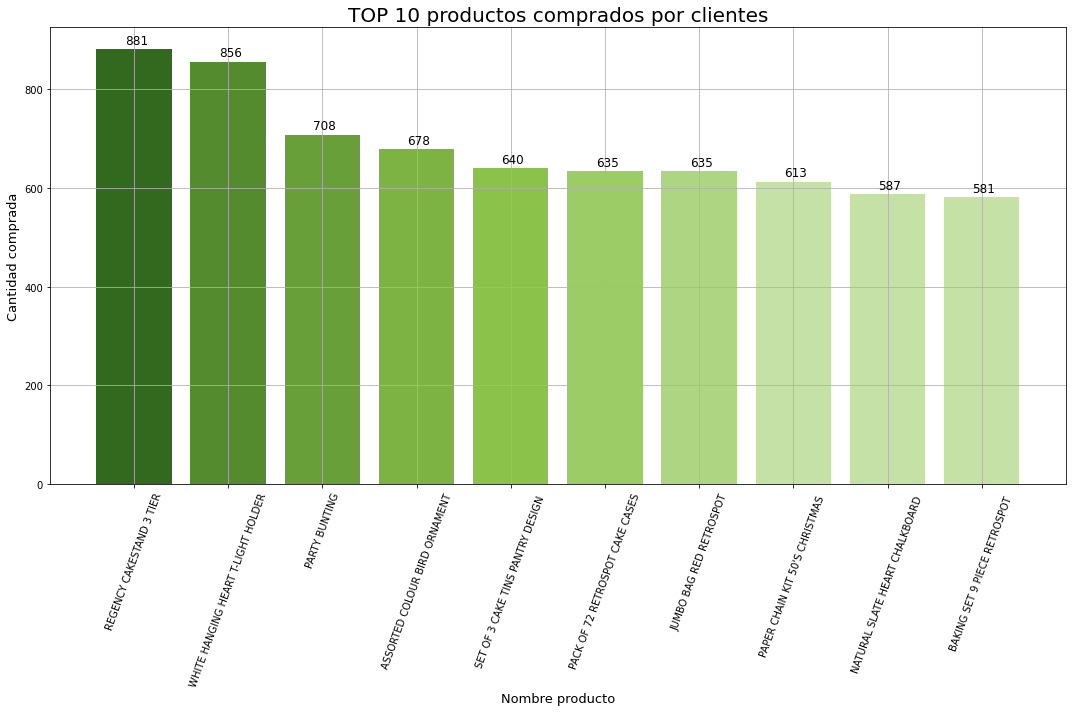

In [94]:
df_data = df_productos.head(10)
colores = ["#33691E", "#558B2F", "#689F38", "#7CB342", "#8BC34A", "#9CCC65", "#AED581", "#C5E1A5", "#C5E1A5", "#C5E1A5"]
plt.figure(figsize=(15,10))
plt.grid()
plt.bar(df_data["Description"], df_data["CustomerID"], color = colores)
plt.xticks(rotation = 70)
plt.xlabel("Nombre producto", fontsize = 13)
plt.ylabel("Cantidad comprada", fontsize = 13)
plt.title("TOP 10 productos comprados por clientes", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_data["CustomerID"]):
    plt.text(x = index-0.098, y = data + 10, s = f"{data}", fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

_Comentarios: la información que aporta este gráfico, permite reconocer los productos con mayor probabilidad de ser vendidos, por lo que se podría elaborar una estrategía de ofertas y marketing generalizada en base a estos productos sin la necesidad de segmentar a los clientes de forma específica._

<hr>

## Horario específico de compra
A continuación se agrupan las __compras__ en función del día y hora, para posteriormente contar el número de facturas emitidas en esos días. Esto finalmente se muestra en un mapa de calor que permite identificar el tramo horario que posee mayor actividad de compra y los días de los meses en que hay mayor actividad.

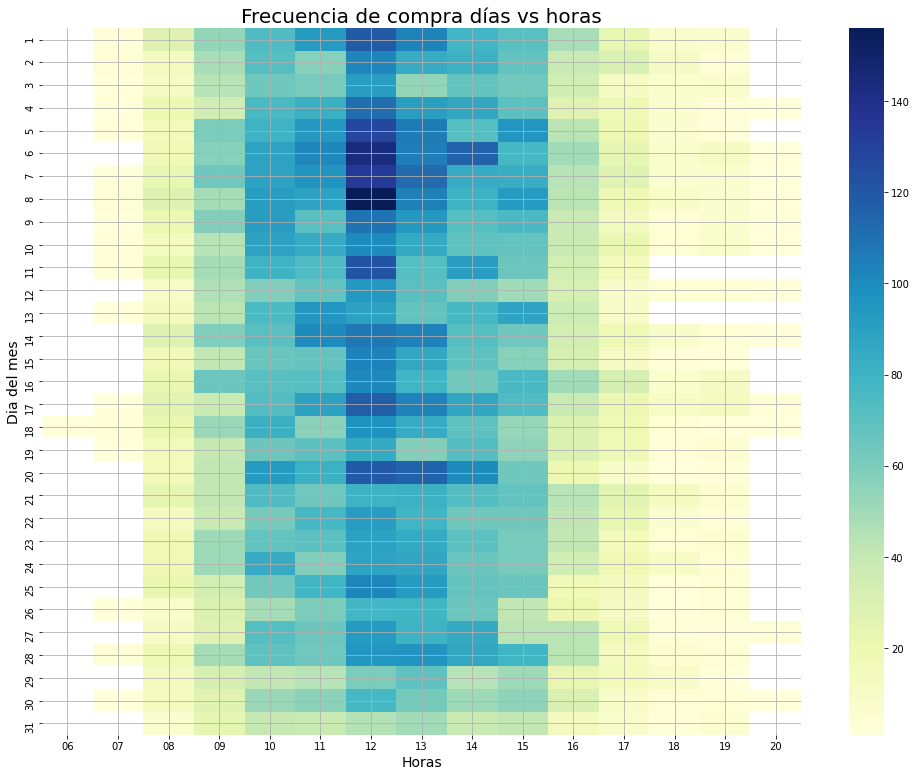

In [95]:
# Se agrupa por dia y hora la cantidad de facturas UNICAS ocurridas y se almcanena como arreglo
grouped_data_new  = df_compras.groupby(["Dia", "Hour"])["InvoiceNo"].unique().reset_index()
# Del dato agrupado se cuenta la cantidad de transaccioens que hubo
grouped_data_new["InvoiceNo"] = grouped_data_new["InvoiceNo"].apply(len)
# Se deja como indice de la matriz los dias y las horas para posterior rellenar esta con la cantidad de transacciones
grouped_data_new = grouped_data_new.pivot('Dia', 'Hour', 'InvoiceNo')

# Se instancia mapa de calor de las horas con mas transacciones respecto a los dias
plt.figure(figsize=(17,13))
sns.heatmap(grouped_data_new, cmap="YlGnBu")
plt.title("Frecuencia de compra días vs horas" , fontsize = 20)
plt.xlabel("Horas", fontsize = 14)
plt.ylabel("Dia del mes", fontsize = 14)
plt.grid()
plt.show()

_Comentarios: Se puede apreciar que, desde el punto de vista del tramo horario la mayoría de las ventas ocurre entre las 10:00 hrs. y las 15:00 hrs. y además desde el punto de vista de los días, éstas se concentran entre los primeros 11 días del mes; pero surge un leve peak de ventas entorno al día número 20 del mes. Se puede recomendar otorgar un apoyo a los servidores entre los días 4 a 10 del mes en curso, en el tramo horario que va desde las 10:00 hrs. a las 15:00 hrs. con el fin de que el servicio se mantenga lo más estable posible y así los tiempos de respuestas de los clientes no se vean afectados._

<hr>

## RFM
Se aplica una segmentación RFM para alcanzar el grupo específico de consumidores, basados en el historial de transacciones de los clientes:

- Ultima compra
- Frecuencia de compra
- Gasto en la última compra

- R: recencia, días desde la última compra realizada
- F: frecuencia, total de compras realizadas
- M: monetario, valor de la compra realizada

La segmentación RFM se basa en el principio de que el 80% de los ingresos proviene del 20% de los clientes. Para esto se trabaja con puntajes de cuantiles.

### Cálculo de la recencia (días desde la última compra realizada)

In [96]:
# En un nuevo DF se agrupan los consumidores (CustomerID) según su última compra
recency_df_compras = df_compras.groupby(by='CustomerID', as_index=False)['Date'].max()
# Se crean las columnas asociadas a los campos nuevos
recency_df_compras.columns = ['CustomerID','LastPurchaseDate']
recency_df_compras.head()

CustomerID LastPurchaseDate
0       12346       2011-01-18
1       12347       2011-12-07
2       12348       2011-09-25
3       12349       2011-11-21
4       12350       2011-02-02

In [97]:
# Se obtiene el rango de fechas que abarca el set de datos
print("Fecha de inicio: ", df_compras["InvoiceDate"].dt.date.min())
print("Fecha de término: ", df_compras["InvoiceDate"].dt.date.max())

Fecha de inicio:  2010-12-01
Fecha de término:  2011-12-09


Se sabe que la última compra se realizó el 09-12-2011, por lo que se emplea esta última para calcular el recencia.

In [98]:
# Se calcula la recencia en días, en base a la fecha de la ultima compra menos la fecha de la compra del cliente
recency_df_compras['Recency'] = recency_df_compras['LastPurchaseDate'].apply(lambda x: (df_compras["InvoiceDate"].dt.date.max() - x).days)
recency_df_compras

CustomerID LastPurchaseDate  Recency
0          12346       2011-01-18      325
1          12347       2011-12-07        2
2          12348       2011-09-25       75
3          12349       2011-11-21       18
4          12350       2011-02-02      310
...          ...              ...      ...
4334       18280       2011-03-07      277
4335       18281       2011-06-12      180
4336       18282       2011-12-02        7
4337       18283       2011-12-06        3
4338       18287       2011-10-28       42

[4339 rows x 3 columns]

### Cálculo de la frecuencia de compra

In [99]:
# Se realiza una copia del dataset de compras
frequency_data = df_compras.copy()
# Se eliminan los datos duplicados que esten sobre el numero de factura y el id de cliente
frequency_data.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_data.shape

(18536, 19)

In [100]:
# Se agrupa por id y se cuenta la cantidad de numero de facturas por cliente
frequency_df_compras = frequency_data.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
# Se asignan los nombres a las columnas
frequency_df_compras.columns = ['CustomerID','Frequency']
frequency_df_compras

CustomerID  Frequency
0          12346          1
1          12347          7
2          12348          4
3          12349          1
4          12350          1
...          ...        ...
4334       18280          1
4335       18281          1
4336       18282          2
4337       18283         16
4338       18287          3

[4339 rows x 2 columns]

### Cálculo del consumo monetario

In [101]:
# Se suma todo el gasto por cada id de cliente
monetary_df_compras = df_compras.groupby('CustomerID',as_index=False)['Amount_Spent'].sum()
monetary_df_compras.columns = ['CustomerID','Monetary']
monetary_df_compras

CustomerID  Monetary
0          12346  77183.60
1          12347   4310.00
2          12348   1797.24
3          12349   1757.55
4          12350    334.40
...          ...       ...
4334       18280    180.60
4335       18281     80.82
4336       18282    178.05
4337       18283   2094.88
4338       18287   1837.28

[4339 rows x 2 columns]

Se combinan los 3 dataset creados, asociados a la segmentación RFM

In [158]:
#combinar recency, frecuency, monetary
rf = recency_df_compras.merge(frequency_df_compras, left_on='CustomerID', right_on='CustomerID')
rfm = rf.merge(monetary_df_compras, left_on='CustomerID', right_on='CustomerID' )
# Se borra la columna de la ultima fecha de compra
del rfm["LastPurchaseDate"]
# Se deja el id de cliente como indice del dataset
rfm.set_index('CustomerID',inplace=True)
rfm.head()

Recency  Frequency  Monetary
CustomerID                              
12346           325          1  77183.60
12347             2          7   4310.00
12348            75          4   1797.24
12349            18          1   1757.55
12350           310          1    334.40

In [159]:
#separarar en cuantiles, para obtener las fronteras
quantile = rfm.quantile(q=[0.25, 0.5, 0.75])
quantile

Recency  Frequency  Monetary
0.25     17.0        1.0   307.245
0.50     50.0        2.0   674.450
0.75    141.5        5.0  1661.640

In [160]:
# Definir score (x = valor, p = recency, monetary, frequency, d= cuartil)
# valor bajo en recency es bueno para la tienda
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Definir score (x = valor, p = recency, monetary, frequency, d= cuartil)
# alto valor en monetary y frequency es bueno para la tienda
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [161]:
# Se determina el cuartil al que pertenecen en cada categoría de RFM
rfm['R_Quantile'] = rfm['Recency'].apply(RScore, args=('Recency', quantile))
rfm['F_Quantile'] = rfm['Frequency'].apply(FMScore, args=('Frequency', quantile))
rfm['M_Quantile'] = rfm['Monetary'].apply(FMScore, args=('Monetary', quantile))

#calcular el RFM score
rfm['RFMScore'] = rfm.R_Quantile.map(str) \
                            + rfm.F_Quantile.map(str) \
                            + rfm.M_Quantile.map(str)
rfm

Recency  Frequency  Monetary  R_Quantile  F_Quantile  M_Quantile  \
CustomerID                                                                     
12346           325          1  77183.60           4           4           1   
12347             2          7   4310.00           1           1           1   
12348            75          4   1797.24           3           2           1   
12349            18          1   1757.55           2           4           1   
12350           310          1    334.40           4           4           3   
...             ...        ...       ...         ...         ...         ...   
18280           277          1    180.60           4           4           4   
18281           180          1     80.82           4           4           4   
18282             7          2    178.05           1           3           4   
18283             3         16   2094.88           1           1           1   
18287            42          3   1837.28           2           2           1   

           RFMScore  
CustomerID           
12346           441  
12347           111  
12348           321  
12349           241  
12350           443  
...             ...  
18280           444  
18281           444  
18282           134  
18283           111  
18287           221  

[4339 rows x 7 columns]

In [162]:
rfm.describe()

Recency    Frequency       Monetary   R_Quantile   F_Quantile  \
count  4339.000000  4339.000000    4339.000000  4339.000000  4339.000000   
mean     92.041484     4.271952    2053.793018     2.493893     2.680111   
std     100.007757     7.705493    8988.248381     1.122159     1.143869   
min       0.000000     1.000000       0.000000     1.000000     1.000000   
25%      17.000000     1.000000     307.245000     1.000000     2.000000   
50%      50.000000     2.000000     674.450000     2.000000     3.000000   
75%     141.500000     5.000000    1661.640000     3.500000     4.000000   
max     373.000000   210.000000  280206.020000     4.000000     4.000000   

        M_Quantile  
count  4339.000000  
mean      2.500115  
std       1.118266  
min       1.000000  
25%       1.500000  
50%       3.000000  
75%       3.500000  
max       4.000000

In [163]:
print("===================================================================")
print("Tamaño del dataframe:")
print(rfm.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(rfm.dtypes)
print("===================================================================")

Tamaño del dataframe:
(4339, 7)
Tipo de variable de las columnas:
Recency         int64
Frequency       int64
Monetary      float64
R_Quantile      int64
F_Quantile      int64
M_Quantile      int64
RFMScore       object
dtype: object


In [164]:
df_clientes_frecuentes = rfm[rfm['F_Quantile'] == 1]
promedio_frecuencia = df_clientes_frecuentes["Frequency"].mean()
print("Cantidad de clientes más frecuentes: ", len(df_clientes_frecuentes))
print("Frecuencia promedio de compra de estos clientes: {:.2f} compras".format(promedio_frecuencia))

Cantidad de clientes más frecuentes:  872
Frecuencia promedio de compra de estos clientes: 12.71 compras


_Comentario: al aplicar separación por cuartiles sobre la segmentación RFM, se puede obtener que los clientes más frecuentes son los del primer cuartil, lo cual equivale a 872 clientes. Respecto a la frecuencia de compra de estos clientes, es tomar la misma data y obtener el promedio de frecuencia de compras._

In [165]:
print("Mejores Clientes: ",len(rfm[rfm['RFMScore']=='111']))
print("Grandes Gastadores: ",len(rfm[rfm['M_Quantile']==1]))
print('Casi Perdidos: ', len(rfm[rfm['RFMScore']=='134']))
print('Clientes Perdidos: ',len(rfm[rfm['RFMScore']=='344']))
print('Clientes Baratos Perdidos: ',len(rfm[rfm['RFMScore']=='444']))

Mejores Clientes:  456
Grandes Gastadores:  1085
Casi Perdidos:  34
Clientes Perdidos:  208
Clientes Baratos Perdidos:  443


_Comentario: como dato extra, se pueden obtener a los mejores clientes desde los 3 puntos de vista de la segmentación RFM, que equivalen a los que se ubican en el primer cuartil en las 3 categorías. También se puede saber cuáles son los clientes exclusivamente más gastadores, que serían los que se encuentren en el primer cuartil de consumo monetario, o sea, 1085 clientes. Así mismo se puede ir creando subcategorías para cada combinación de cuartiles, como los clientes que es muy problable que se pierdan, los clientes ya perdidos y los clientes baratos perdidos._

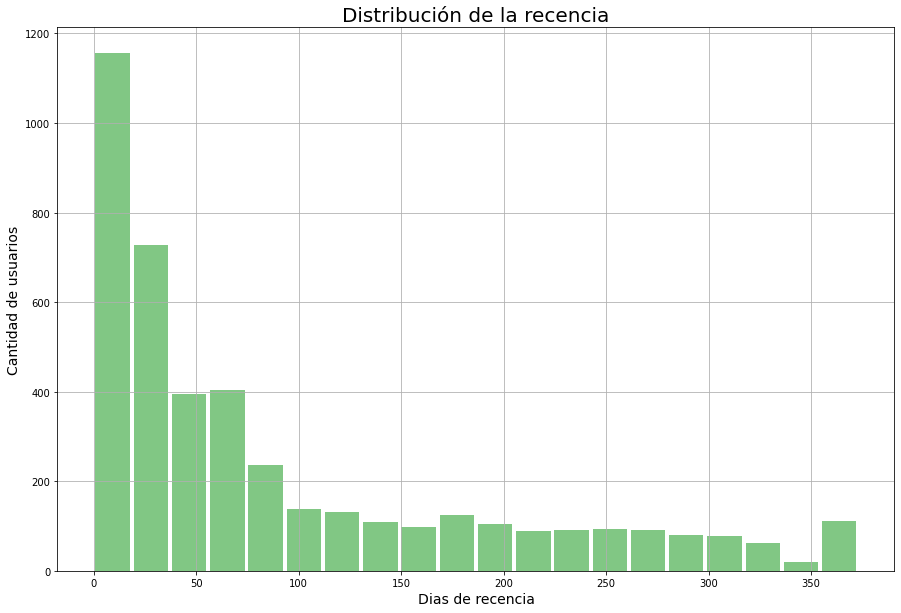

In [166]:
plt.figure(figsize=(15,10))
plt.hist(rfm["Recency"], rwidth = 0.9, bins = 20, color="#81C784")
plt.title("Distribución de la recencia", fontsize=20)
plt.grid()
plt.xlabel("Dias de recencia", fontsize=14)
plt.ylabel("Cantidad de usuarios", fontsize=14)
plt.show()

_Comentario: la recencia no distribuye de una forma normal, esta característica se puede apreciar con mucha claridad, puesto que hay un gran volumen de usuarios que posee entre 0 y 50 días de recencia. Después se observa un claro descenso de esto, exceptuando por la última categoría, que serían los usuarios con una recencia mayor a 350 días. Esto se puede apreciar con mayor claridad al observar el siguiente gráfico de bigotes:_

In [167]:
# Funcion para crear una tabla con los valores de BoxPlot
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['cota inferior'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['primer cuartil (25%)'] = bp['boxes'][i].get_ydata()[1]
        dict1['mediana (50%)'] = bp['medians'][i].get_ydata()[1]
        dict1['tercer cuartil (75%)'] = bp['boxes'][i].get_ydata()[2]
        dict1['cota superior'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

In [168]:
labels = ["Recencia"]
bp = plt.boxplot([rfm["Recency"]], labels = labels)
plt.close()  #se cancela la muestra el grafico para que solo se muestre la tabla
get_box_plot_data(labels, bp)

label  cota inferior  primer cuartil (25%)  mediana (50%)  \
0  Recencia            0.0                  17.0           50.0   

   tercer cuartil (75%)  cota superior  
0                 141.5          326.0

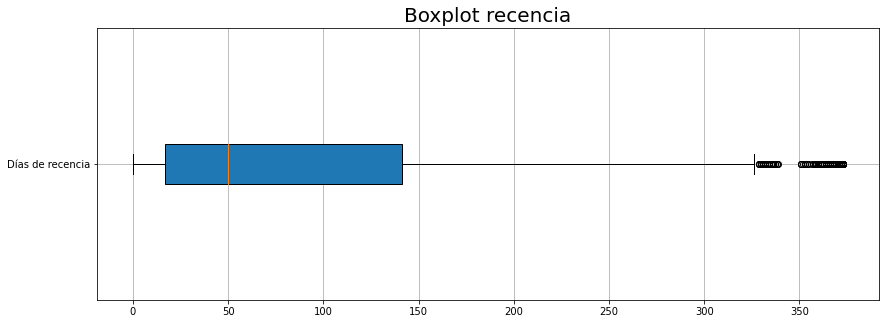

In [169]:
plt.figure(figsize=(14, 5))
plt.grid()
plt.title("Boxplot recencia", fontsize = 20)
plt.boxplot(rfm["Recency"], labels = ["Días de recencia"], patch_artist=True, vert=False)
plt.show()

In [170]:
rfm[rfm["Recency"] > 326].shape

(155, 7)

_Comentario: existe un cierto número de registros outliers que están por sobre la cota superior del gráfico de bigotes, para ser extactos, corresponden a 155 clientes._

<hr>

## Clusterización de clientes en función de su frecuencia de compra
A continuación se procede a la clusterización de clientes para luego categorízarlos mediante una etiqueta de acuerdo a su frecuencia de compra. Esta clusterización se realizó mediante el set de datos correspondiente a la segmentación RFM. Primero se estandarizó este set de datos, para luego crear 3 cluster mediante el algoritmo de K-Means y finalmente, se observó el valor promedio de la frecuencia para cada grupo, con el fin de colocar un nombre adecuado. <br>
Al ser 3 variables, se realizó un gráfico en 3D que permite visualizar dónde está ubicado cada cluster en el espacio mediante plotly.

In [193]:
# Se extraen las columnas de interes
df_clustering = rfm[["Recency", "Frequency", "Monetary"]]
df_clustering

Recency  Frequency  Monetary
CustomerID                              
12346           325          1  77183.60
12347             2          7   4310.00
12348            75          4   1797.24
12349            18          1   1757.55
12350           310          1    334.40
...             ...        ...       ...
18280           277          1    180.60
18281           180          1     80.82
18282             7          2    178.05
18283             3         16   2094.88
18287            42          3   1837.28

[4339 rows x 3 columns]

In [194]:
# Se estandarizan las variables
df_clustering_std = stats.zscore(df_clustering)
df_clustering_std.describe().apply(lambda s: s.apply('{0:.5f}'.format))

Recency   Frequency    Monetary
count  4339.00000  4339.00000  4339.00000
mean     -0.00000     0.00000    -0.00000
std       1.00012     1.00012     1.00012
min      -0.92045    -0.42467    -0.22852
25%      -0.75044    -0.42467    -0.19434
50%      -0.42043    -0.29488    -0.15348
75%       0.49460     0.09450    -0.04363
max       2.80969    26.70196    30.94978

In [195]:
# Se crea la instancia de kmeans para 3 cluster
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_clustering_std)
# Se muestran los centroides de cada cluster
cetroides = kmeans.cluster_centers_
print(cetroides)

[[-0.86583208  8.07673458  9.32998501]
 [ 1.54086676 -0.34921133 -0.15823447]
 [-0.51221653  0.05257211 -0.0218781 ]]


In [196]:
# Se crean los cluster para cada registro del dataset y posteriormente se añaden como nueva columna del df_clustering_std
Cluster = kmeans.fit_predict(df_clustering_std)
df_clustering_std['Cluster'] = Cluster
df_clustering_std.head()

Recency  Frequency  Monetary  Cluster
CustomerID                                        
12346       2.329673  -0.424675  8.359634        2
12347      -0.900449   0.354080  0.251046        0
12348      -0.170421  -0.035297 -0.028546        0
12349      -0.740443  -0.424675 -0.032963        0
12350       2.179667  -0.424675 -0.191315        2

In [197]:
# Se añade la coordenada de centroide para cada cluster
df_clustering_std.loc[df_clustering_std['Cluster']==0,'Cen_x']=cetroides[0][0]
df_clustering_std.loc[df_clustering_std['Cluster']==1,'Cen_x']=cetroides[1][0]
df_clustering_std.loc[df_clustering_std['Cluster']==2,'Cen_x']=cetroides[2][0]

df_clustering_std.loc[df_clustering_std['Cluster']==0,'Cen_y']=cetroides[0][1]
df_clustering_std.loc[df_clustering_std['Cluster']==1,'Cen_y']=cetroides[1][1]
df_clustering_std.loc[df_clustering_std['Cluster']==2,'Cen_y']=cetroides[2][1]

df_clustering_std.loc[df_clustering_std['Cluster']==0,'Cen_z']=cetroides[0][2]
df_clustering_std.loc[df_clustering_std['Cluster']==1,'Cen_z']=cetroides[1][2]
df_clustering_std.loc[df_clustering_std['Cluster']==2,'Cen_z']=cetroides[2][2]
df_clustering_std

Recency  Frequency  Monetary  Cluster     Cen_x     Cen_y  \
CustomerID                                                               
12346       2.329673  -0.424675  8.359634        2 -0.512217  0.052572   
12347      -0.900449   0.354080  0.251046        0 -0.865832  8.076735   
12348      -0.170421  -0.035297 -0.028546        0 -0.865832  8.076735   
12349      -0.740443  -0.424675 -0.032963        0 -0.865832  8.076735   
12350       2.179667  -0.424675 -0.191315        2 -0.512217  0.052572   
...              ...        ...       ...      ...       ...       ...   
18280       1.849655  -0.424675 -0.208429        2 -0.512217  0.052572   
18281       0.879618  -0.424675 -0.219531        2 -0.512217  0.052572   
18282      -0.850447  -0.294882 -0.208712        0 -0.865832  8.076735   
18283      -0.890448   1.522213  0.004572        0 -0.865832  8.076735   
18287      -0.500434  -0.165090 -0.024091        0 -0.865832  8.076735   

               Cen_z  
CustomerID            
12346      -0.021878  
12347       9.329985  
12348       9.329985  
12349       9.329985  
12350      -0.021878  
...              ...  
18280      -0.021878  
18281      -0.021878  
18282       9.329985  
18283       9.329985  
18287       9.329985  

[4339 rows x 7 columns]

In [198]:
# Se agrupa por cluster para observar las caracteristicas de cada caso
dataAgrupado = df_clustering_std.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean"
})
dataAgrupado

Recency  Frequency  Monetary
Cluster                               
0       -0.512217   0.052572 -0.021878
1       -0.865832   8.076735  9.329985
2        1.540867  -0.349211 -0.158234

Se puede apreciar las siguientes características de los cluster en función de los promedios:
- Grupo 0: Frecuencia promedio (Frecuency = 0.052572)
- Grupo 1: clientes de alta frecuencia (Frecuency = 8.076735)
- Grupo 2: clientes de baja frecuencia (Frecuency = -0.349211)

<br>

En base a estas descripciónes, los nombres que se le colocan a cada cluster son los siguientes:
- Cluster 0: clientes frecuencia promedio
- Cluster 1: clientes alta frecuencia
- Cluster 2: clientes baja frecuencia

In [199]:
# Se añade el nombre al cluster
cluster_tag = {0 : "Clientes frecuencia promedio", 1 : "Clientes alta frecuencia", 2:"Clientes baja frecuencia"}
df_clustering_std = df_clustering_std.replace({"Cluster" : cluster_tag})
df_clustering_std.head()

Recency  Frequency  Monetary                       Cluster  \
CustomerID                                                                
12346       2.329673  -0.424675  8.359634      Clientes baja frecuencia   
12347      -0.900449   0.354080  0.251046  Clientes frecuencia promedio   
12348      -0.170421  -0.035297 -0.028546  Clientes frecuencia promedio   
12349      -0.740443  -0.424675 -0.032963  Clientes frecuencia promedio   
12350       2.179667  -0.424675 -0.191315      Clientes baja frecuencia   

               Cen_x     Cen_y     Cen_z  
CustomerID                                
12346      -0.512217  0.052572 -0.021878  
12347      -0.865832  8.076735  9.329985  
12348      -0.865832  8.076735  9.329985  
12349      -0.865832  8.076735  9.329985  
12350      -0.512217  0.052572 -0.021878

In [178]:
labels=  {
    "Recency" : "Nivel de recencia ", 
    "Frequency": "Nivel de frecuencia ",
    "Monetary" : "Nivel de consumo ",
    "Cluster" : "Grupo "
}
fig = px.scatter_3d(df_clustering_std, 
                    x='Recency', 
                    y='Frequency', 
                    z='Monetary',
                    hover_data=['Cluster'],
                    color='Cluster',
                    symbol='Cluster',
                    labels = labels)
fig.show()

_Comentario: se puede apreciar con claridad la separación entre los cluster. En base a esto, se puede crear una estrategia de marketing con el fin de que, aquellos clientes del cluster azul (frecuencia baja) puedan aumentar su frecuencia y pasar a ser clientes del cluster anaranjado (frecuencia media) y algo similar se puede hacer con estos últimos para que pasen a ser clientes del cluster verde (frecuencia alta). <br>
Otra apreciación no menor que se puede apreciar, es que, la mayoría de los clientes están bajo los cluster de frecuencia media y baja; los clientes de alta frecuencia son muy pocos, por lo que se demuestra en cierto centido la premisa de la segmentación RFM "el 80% de los ingresos proviene del 20% de los clientes".<br>
Respecto a lo que se aludió en el primer párrafo, a continuación se analizará por cada tipo de cliente de acuerdo a su frecuencia, los productos que compran._

<hr>

## Productos más comprados por clientes según su frecuencia de compra
A partir de la segmentación RFM, se buscó el TOP 10 de productos comprados, con el fin de obtener los datos para elaborar una futura estrategia de marketing y lograr atraer más la atención de los clientes.

In [200]:
rfm.head()

Recency  Frequency  Monetary  R_Quantile  F_Quantile  M_Quantile  \
CustomerID                                                                     
12346           325          1  77183.60           4           4           1   
12347             2          7   4310.00           1           1           1   
12348            75          4   1797.24           3           2           1   
12349            18          1   1757.55           2           4           1   
12350           310          1    334.40           4           4           3   

           RFMScore                   Cluster  CustomerID  
CustomerID                                                 
12346           441  Clientes alta frecuencia       12346  
12347           111  Clientes baja frecuencia       12347  
12348           321  Clientes baja frecuencia       12348  
12349           241  Clientes baja frecuencia       12349  
12350           443  Clientes alta frecuencia       12350

In [201]:
# Se asocia el cluster 
rfm['Cluster'] = Cluster
# Se cambia el codigo del cluster por el nombre que se creo
cluster_tag = {0 : "Clientes frecuencia promedio", 1 : "Clientes alta frecuencia", 2:"Clientes baja frecuencia"}
rfm = rfm.replace({"Cluster" : cluster_tag})
# Se deja el id del cliente como columna
rfm["CustomerID"] = rfm.index
rfm.head()

Recency  Frequency  Monetary  R_Quantile  F_Quantile  M_Quantile  \
CustomerID                                                                     
12346           325          1  77183.60           4           4           1   
12347             2          7   4310.00           1           1           1   
12348            75          4   1797.24           3           2           1   
12349            18          1   1757.55           2           4           1   
12350           310          1    334.40           4           4           3   

           RFMScore                       Cluster  CustomerID  
CustomerID                                                     
12346           441      Clientes baja frecuencia       12346  
12347           111  Clientes frecuencia promedio       12347  
12348           321  Clientes frecuencia promedio       12348  
12349           241  Clientes frecuencia promedio       12349  
12350           443      Clientes baja frecuencia       12350

In [202]:
rfm["Cluster"].value_counts()

Clientes frecuencia promedio    3226
Clientes baja frecuencia        1087
Clientes alta frecuencia          26
Name: Cluster, dtype: int64

In [203]:
# Se crea una lista con los id de clientes de las diferentes frecuencias
lista_clientes_frecuencia_baja = []
lista_clientes_frecuencia_media = []
lista_clientes_frecuencia_alta = []
for i, e in enumerate(rfm["CustomerID"][rfm["Cluster"] == "Clientes baja frecuencia"]):
    lista_clientes_frecuencia_baja.append(e)
    
for i, e in enumerate(rfm["CustomerID"][rfm["Cluster"] == "Clientes frecuencia promedio"]):
    lista_clientes_frecuencia_media.append(e)
    
for i, e in enumerate(rfm["CustomerID"][rfm["Cluster"] == "Clientes alta frecuencia"]):
    lista_clientes_frecuencia_alta.append(e)

Se crean subdatasets donde estan los clientes segmentados por su frecuencia de compra.

In [204]:
# Se extraen las columnas que no poseen nulos esos campos y que tengan las comunas que corresponden
df_clientes_frec_baja = df_compras[df_compras.CustomerID.isin(lista_clientes_frecuencia_baja)]
df_clientes_frec_media= df_compras[df_compras.CustomerID.isin(lista_clientes_frecuencia_media)]
df_clientes_frec_alta = df_compras[df_compras.CustomerID.isin(lista_clientes_frecuencia_alta)]

In [205]:
print("===================================================================")
print("Compras realizadas por clientes de alta frecuencia:")
print(df_clientes_frec_alta.shape)
print("===================================================================")
print("Compras realizadas por clientes de frecuencia media:")
print(df_clientes_frec_media.shape)
print("===================================================================")
print("Comprasrealizadas por clientes de baja frecuencia:")
print(df_clientes_frec_baja.shape)
print("===================================================================")

Compras realizadas por clientes de alta frecuencia:
(41025, 19)
Compras realizadas por clientes de frecuencia media:
(325569, 19)
Comprasrealizadas por clientes de baja frecuencia:
(31330, 19)


Se obtienen los 10 productos más comprados por cada segmento.

<hr>

### Productos más comprados por los clientes de alta frecuencia

In [206]:
# Se agrupan por el nombre del producto e id unico de cliente
df_productos_alta = pd.DataFrame(df_clientes_frec_alta.groupby("Description")["CustomerID"].nunique()) 
# Se reseta index
df_productos_alta = df_productos_alta.reset_index().sort_values("CustomerID", ascending=False)
# Se crea un código unico asociado al producto (optimizar espacios en el grafico)
df_productos_alta["Description_code"] = df_productos_alta["Description"].astype("category").cat.codes
df_productos_alta["Description_code"] = df_productos_alta["Description_code"].astype(str)

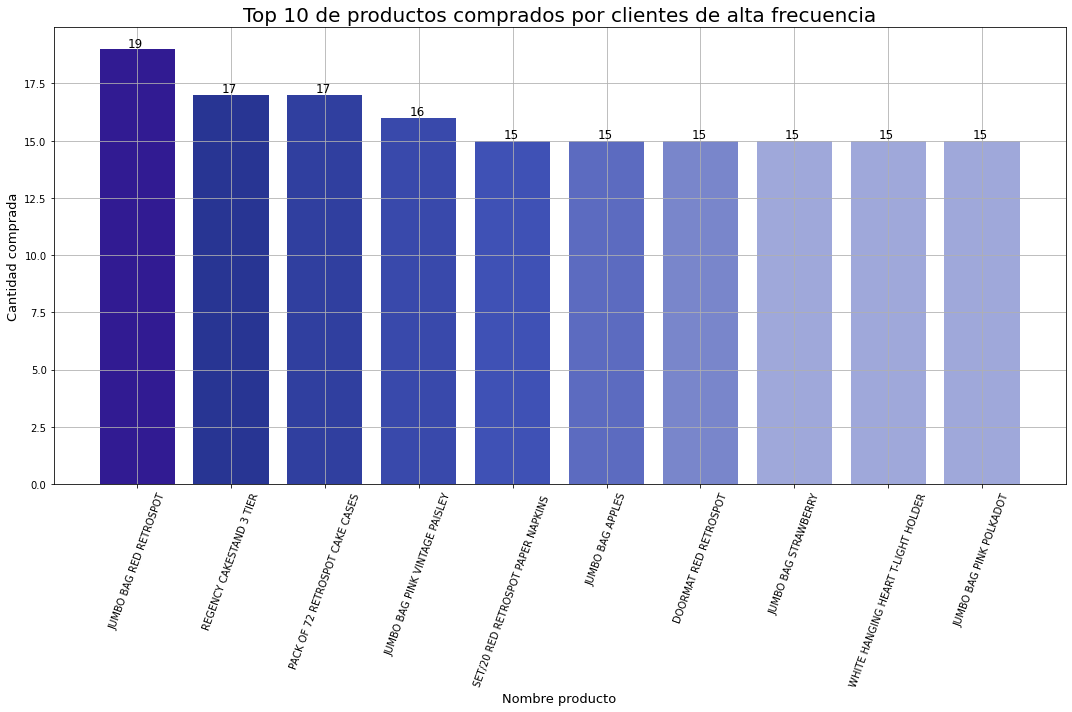

In [207]:
df_data = df_productos_alta.head(10)
colores = ["#311B92","#283593", "#303F9F", "#3949AB", "#3F51B5", "#5C6BC0", "#7986CB", "#9FA8DA", "#9FA8DA", "#9FA8DA"]
plt.figure(figsize=(15,10))
plt.grid()
plt.bar(df_data["Description"], df_data["CustomerID"], color = colores)
plt.xticks(rotation = 70)
plt.xlabel("Nombre producto", fontsize = 13)
plt.ylabel("Cantidad comprada", fontsize = 13)
plt.title("Top 10 de productos comprados por clientes de alta frecuencia", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_data["CustomerID"]):
    plt.text(x = index-0.098, y = data + 0.099, s = f"{data}", fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

_Comentario: se puede apreciar que, la cantidad comprada por cada producto es muy baja, lo cual es consecuente con la cantidad de integrantes que pertenecen a este cluster._

<hr>

### Productos más comprados por los clientes de frecuencia promedio

In [208]:
# Se agrupan por el nombre del producto e id unico de cliente
df_productos_media = pd.DataFrame(df_clientes_frec_media.groupby("Description")["CustomerID"].nunique()) 
# Se reseta index
df_productos_media = df_productos_media.reset_index().sort_values("CustomerID", ascending=False)
# Se crea un código unico asociado al producto (optimizar espacios en el grafico)
df_productos_media["Description_code"] = df_productos_media["Description"].astype("category").cat.codes
df_productos_media["Description_code"] = df_productos_media["Description_code"].astype(str)

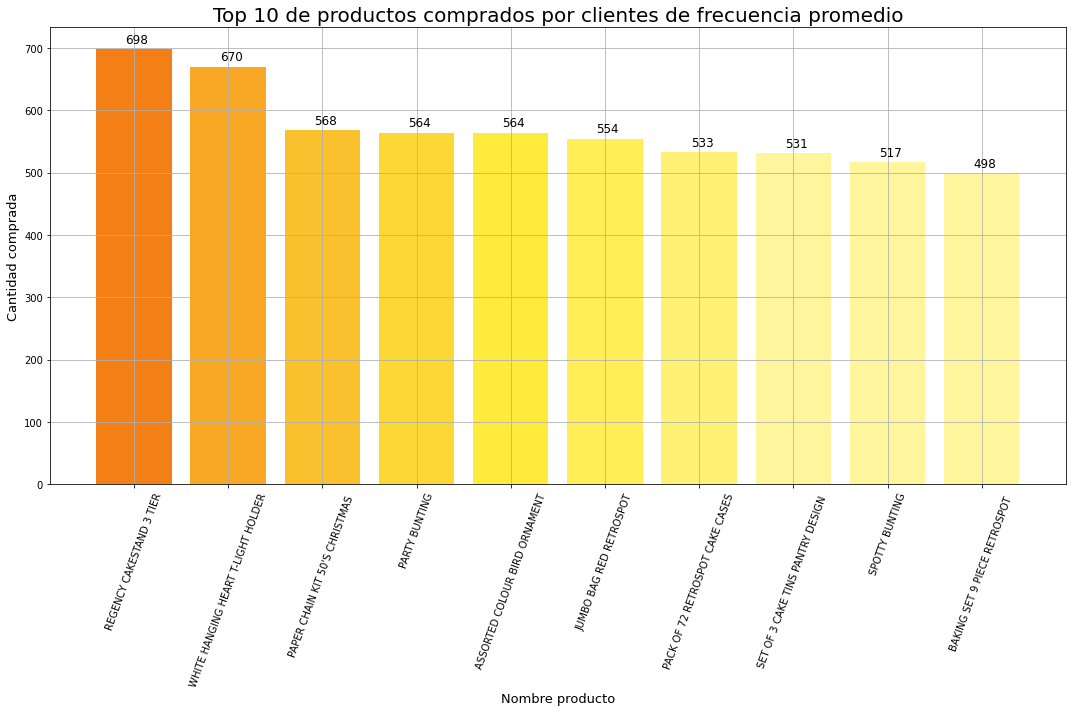

In [209]:
df_data = df_productos_media.head(10)
colores = ["#F57F17","#F9A825", "#FBC02D", "#FDD835", "#FFEB3B", "#FFEE58", "#FFF176", "#FFF59D", "#FFF59D", "#FFF59D"]
plt.figure(figsize=(15,10))
plt.grid()
plt.bar(df_data["Description"], df_data["CustomerID"], color = colores)
plt.xticks(rotation = 70)
plt.xlabel("Nombre producto", fontsize = 13)
plt.ylabel("Cantidad comprada", fontsize = 13)
plt.title("Top 10 de productos comprados por clientes de frecuencia promedio", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_data["CustomerID"]):
    plt.text(x = index-0.09, y = data + 10, s = f"{data}", fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

_Comentario: al ser el grupo promedio, se puede apreciar que la cantidad de compras por producto es muy elevada comparándola con el cluester de los clientes más frecuentes. Este tipo de cliente se podría convencer "fácilmente" para que pueda pasar a la categoría de "clientes frecuentes"._

<hr>

### Productos más comprados por los clientes de baja frecuencia

In [210]:
# Se agrupan por el nombre del producto e id unico de cliente
df_productos_baja = pd.DataFrame(df_clientes_frec_baja.groupby("Description")["CustomerID"].nunique()) 
# Se reseta index
df_productos_baja = df_productos_baja.reset_index().sort_values("CustomerID", ascending=False)
# Se crea un código unico asociado al producto (optimizar espacios en el grafico)
df_productos_baja["Description_code"] = df_productos_baja["Description"].astype("category").cat.codes
df_productos_baja["Description_code"] = df_productos_baja["Description_code"].astype(str)

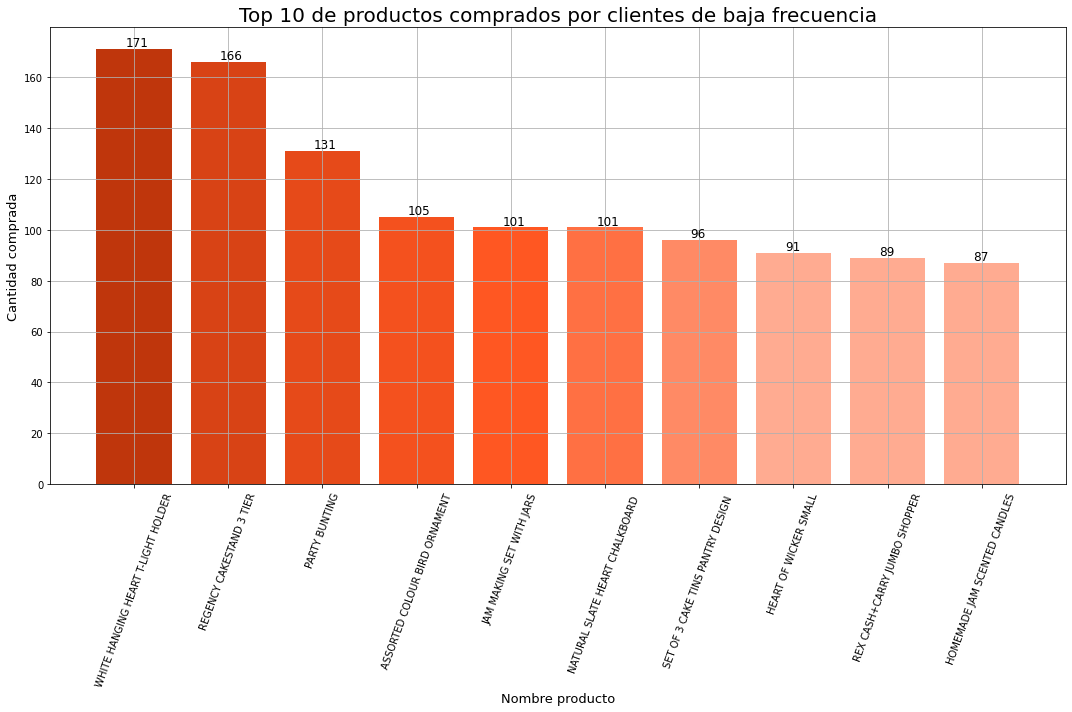

In [211]:
df_data = df_productos_baja.head(10)
colores = ["#BF360C","#D84315", "#E64A19", "#F4511E", "#FF5722", "#FF7043", "#FF8A65", "#FFAB91", "#FFAB91", "#FFAB91"]
plt.figure(figsize=(15,10))
plt.grid()
plt.bar(df_data["Description"], df_data["CustomerID"], color = colores)
plt.xticks(rotation = 70)
plt.xlabel("Nombre producto", fontsize = 13)
plt.ylabel("Cantidad comprada", fontsize = 13)
plt.title("Top 10 de productos comprados por clientes de baja frecuencia", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_data["CustomerID"]):
    plt.text(x = index-0.09, y = data + 1, s = f"{data}", fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

_Comentario: la cantidad de compras por productos de esta categoría de clientes da un indicio relacionado a que, a pesar de ser poco frecuentes, realizan una cantidad "relevante" de compras, por lo que, aquellos clientes que estén más cerca de la frontera para pasar a ser clientes de "frecuencia promedio" se podrían convencer fácilmente mediante ofertas o descuentos de compras en base a sus productos más comprados._

<hr>

## Análisis de la fecha de compra
Dentro del set de datos original, existe una variable llamada _InvoiceDate_ la cual corresponde a la "fecha de factura". Lo que se desea investigar son los períodos y días de mayor compra con mayor detalle. Se trabaja solo con los datos de compras, no las devoluciones.

In [217]:
# Se obtiene el rango de fechas que abarca el set de datos
print("Fecha de inicio: ", df_compras["InvoiceDate"].dt.date.min())
print("Fecha de término: ", df_compras["InvoiceDate"].dt.date.max())

Fecha de inicio:  2010-12-01
Fecha de término:  2011-12-09


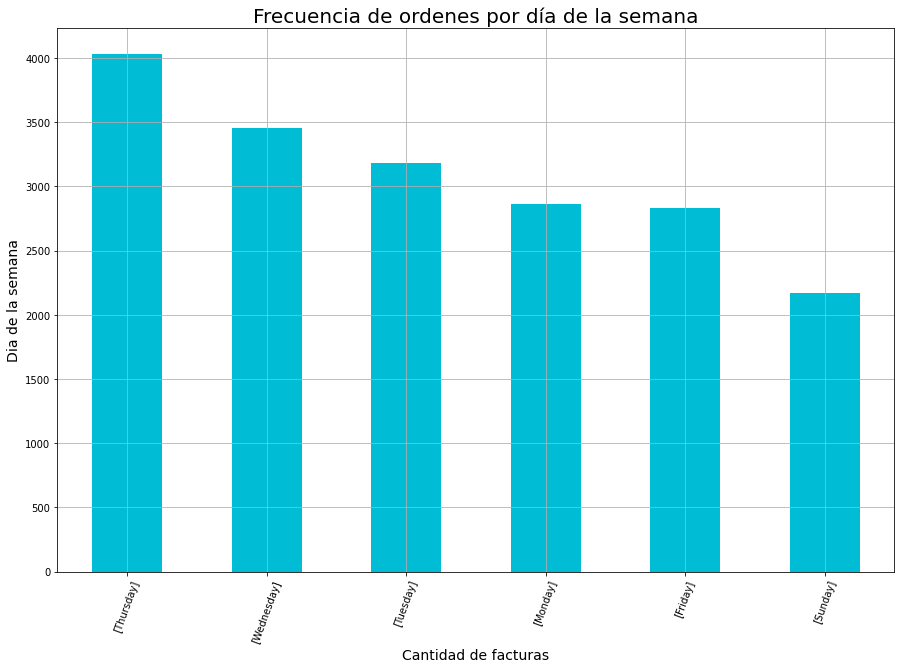

In [218]:
# Se agrupa la cantidad de facturas UNICAS por dia
InvoiceDate = df_compras.groupby(['InvoiceNo'])['NombreDia'].unique()
dfm =  InvoiceDate.value_counts().sort_index( ascending=True)
dfm.to_frame().sort_values("NombreDia", ascending = False).plot.bar(figsize=(15,10), legend=None, color="#00BCD4")

plt.title("Frecuencia de ordenes por día de la semana", fontsize=20)
plt.xlabel("Cantidad de facturas", fontsize = 14)
plt.ylabel("Dia de la semana", fontsize = 14)
plt.xticks(rotation = 70)
plt.grid()
plt.show()

_Comentario: El gráfico se ordena de forma descendiente para observar los días de la semana en que se tiene el mayor número de ventas a partir de la fecha de la factura. El día en que se realiza mayor número de ventas, corresponde al jueves, después vienen los días miércoles, martes, lunes, vierntes y finalmente, el día domingo. Esta información puede ser de utlidad al mezclara con: el tramo horario y rango de días de mayor venta obtenido a partir del mapa de calor expuesto al inicio, si además se mezcla con los productos más comprados por cada segmento de cliente, se puede elaborar una buena estrategia de marketing para una mayor eficacia en la venta de productos a clientes objetivos.

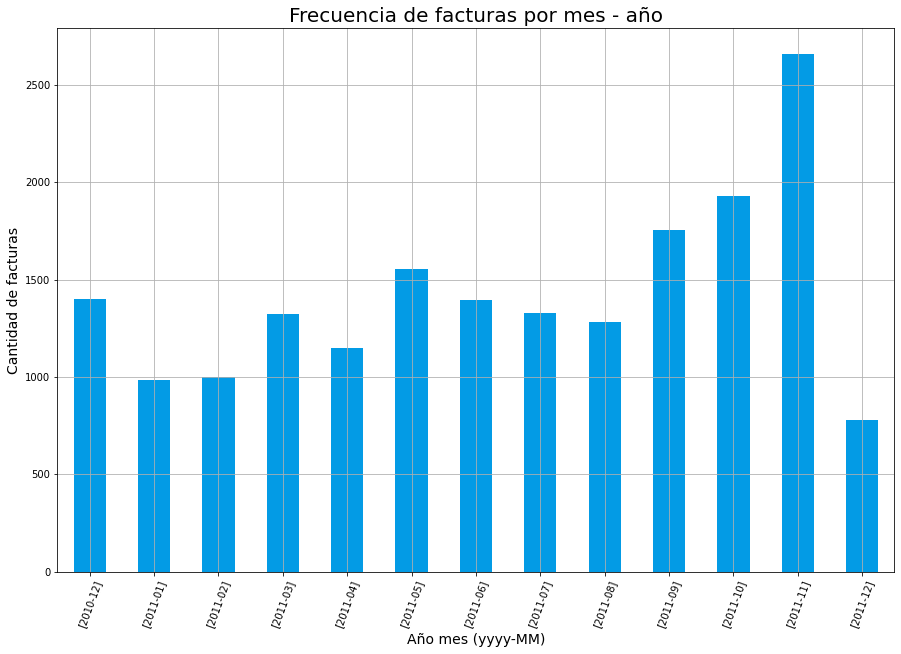

In [219]:
InvoiceDate = df_compras.groupby(['InvoiceNo'])['Yearmonth'].unique()
dfm =  InvoiceDate.value_counts()
dfm.to_frame().sort_index(ascending = True).plot.bar(figsize=(15,10), legend=None, color="#039BE5")

plt.title("Frecuencia de facturas por mes - año", fontsize=20)
plt.xlabel("Año mes (yyyy-MM)", fontsize = 14)
plt.ylabel("Cantidad de facturas", fontsize = 14)
plt.xticks(rotation = 70)
plt.grid()
plt.show()

_Comentario: en este gráfico donde se agrupan las ventas por cada mes del año dentro del rango que abarca la base de datos, se puede apreciar un claro ascenso de ventas a partir del mes de septiembre del año 2011 y que baja abruptamente en diciembre del mismo año. Esto se debe a que lamentablemente, el set de datos no abarcó todo el mes de diciembre (llegó hasta el 9 de diciembre), ya que esa temporada corresponde a la víspera de navidad, temporada del año que se realiza mayor número de ventas. Habría sido ideal que la base de datos pudiese abarcar ese rango de fechas para observar el probable ascenso._

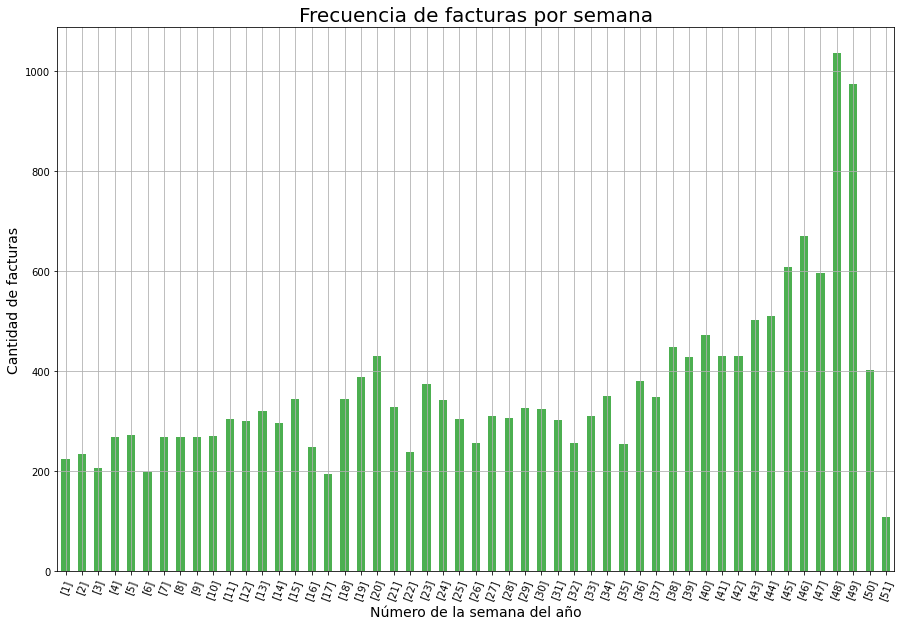

In [221]:
plt.figure(figsize=(15,10))
InvoiceDate = df_compras.groupby(['InvoiceNo'])['Semana'].unique()
InvoiceDate.value_counts().sort_index().plot.bar(color="#4CAF50")
plt.title("Frecuencia de facturas por semana", fontsize=20)
plt.xlabel("Número de la semana del año", fontsize = 14)
plt.ylabel("Cantidad de facturas", fontsize = 14)
plt.xticks(rotation = 70)
plt.grid()
plt.show()

_Comentario: de forma similar al gráfico anterio, en este se puede apreciar de forma más detallada el ascenso de ventas vísperas a navidad, la cual desciende de forma abrupta en las últimas dos semanas debido al límite superior del rango de fechas que abarca la base de datos._

<hr>

## Devoluciones respecto a compras
Dentro del set de datos completo, existe un campo correspondiente al número de factura (InvoiceNo). Este campo es un dato numérico de 6 dígitos único para cada transacción; pero si el código posee una letra "c", corresponde a una devolución. Lo que se desea detallar a continuación es la, comparación entre compras y devoluciones. También los productos con mayor cantida de devoluciones y por último los países con mayor número de devoluciones.

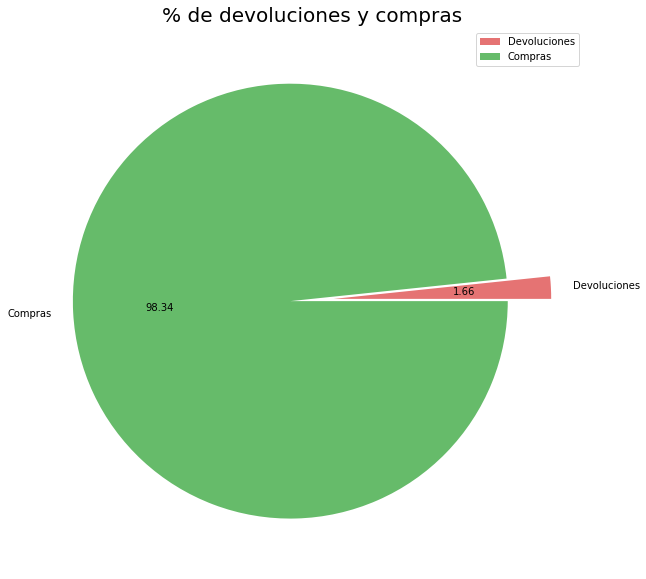

In [222]:
data = {
    "Estado": ["Devoluciones", "Compras"],
    "Cantidad": [df[(df.InvoiceNo.str.contains("C") == True) & ~((df.StockCode == "D") | (df.StockCode == "M"))].shape[0], 
                 df[~(df.InvoiceNo.str.contains("C") == True)].shape[0]]
}

df_invoiceNo = pd.DataFrame(data = data)
plt.figure(figsize=(18,10))
explode = [0.1, 0.1]
color = ["#E57373", "#66BB6A"]
plt.pie(df_invoiceNo["Cantidad"], labels= df_invoiceNo["Estado"], autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de devoluciones y compras", fontsize = 20)
plt.show()

_Comentario: gracias al gráfico de torta, se puede apreciar que la comercializadora tiene un alto grado de eficacia respecto a las ventas, ya que éstas represetan casi la totalidad de los registros correspondientes a toda la base de datos._

In [223]:
# Se sacan los descuentos y "manuales"
df_cancelados = df[(df.InvoiceNo.str.contains("C") == True) & ~((df.StockCode == "D") | (df.StockCode == "M"))]
df_cancelados

InvoiceNo StockCode                        Description  Quantity  \
154      C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
...          ...       ...                                ...       ...   
540448   C581490     22178    VICTORIAN GLASS HANGING T-LIGHT       -12   
540449   C581490     23144    ZINC T-LIGHT HOLDER STARS SMALL       -11   
541715   C581568     21258         VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978   HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979      36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
238    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540448 2011-12-09 09:57:00       1.95     14397.0  United Kingdom  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8967 rows x 8 columns]

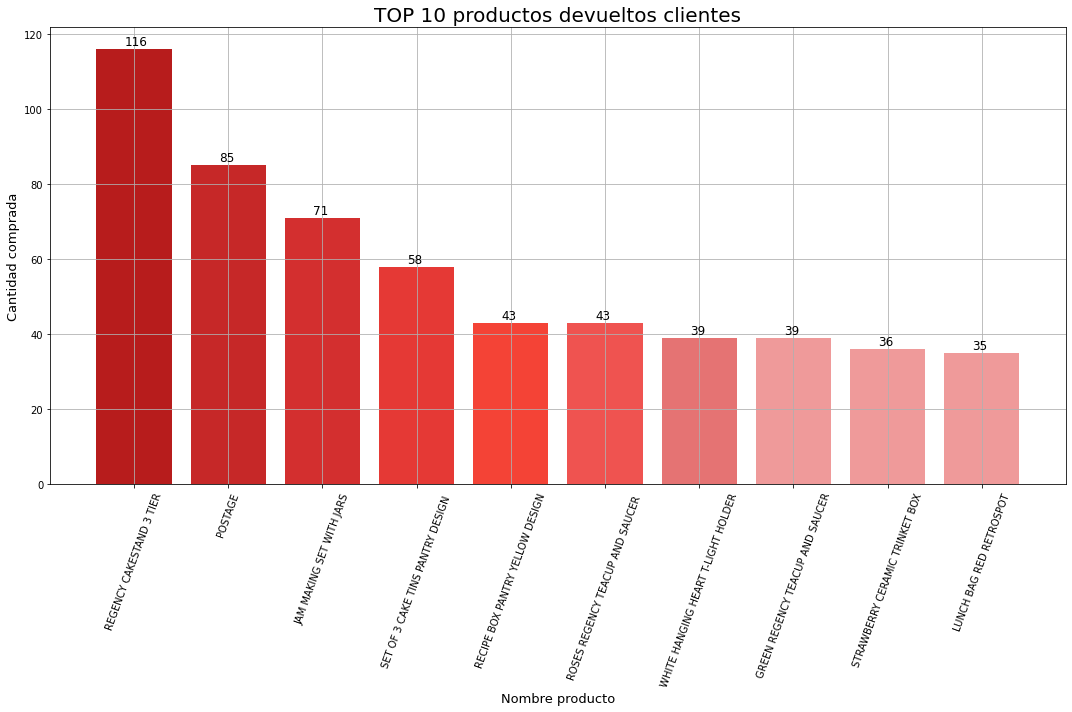

In [229]:
# Se agrupan por el nombre del producto e id unico de cliente
df_productos = pd.DataFrame(df_cancelados.groupby("Description")["CustomerID"].nunique()) 
# Se reseta index
df_productos = df_productos.reset_index().sort_values("CustomerID", ascending=False)
# Se crea un código unico asociado al producto (optimizar espacios en el grafico)
df_productos["Description_code"] = df_productos["Description"].astype("category").cat.codes
df_productos["Description_code"] = df_productos["Description_code"].astype(str)

df_data = df_productos.head(10)
colores = ["#B71C1C","#C62828", "#D32F2F", "#E53935", "#F44336", "#EF5350", "#E57373", "#EF9A9A", "#EF9A9A", "#EF9A9A"]
plt.figure(figsize=(15,10))
plt.grid()
plt.bar(df_data["Description"], df_data["CustomerID"], color = colores)
plt.xticks(rotation = 70)
plt.xlabel("Nombre producto", fontsize = 13)
plt.ylabel("Cantidad comprada", fontsize = 13)
plt.title("TOP 10 productos devueltos clientes", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_data["CustomerID"]):
    plt.text(x = index-0.098, y = data + 1, s = f"{data}", fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

_Comentario: en base al listado de productos con mayor número de devoluciones, se puede realizar una observación relacionada al motivo de la devolución. Esto permite discriminar si el producto es devuelto por fallos (para asi hablar con el fabricante) o si es devuelto por algún otro motivo._

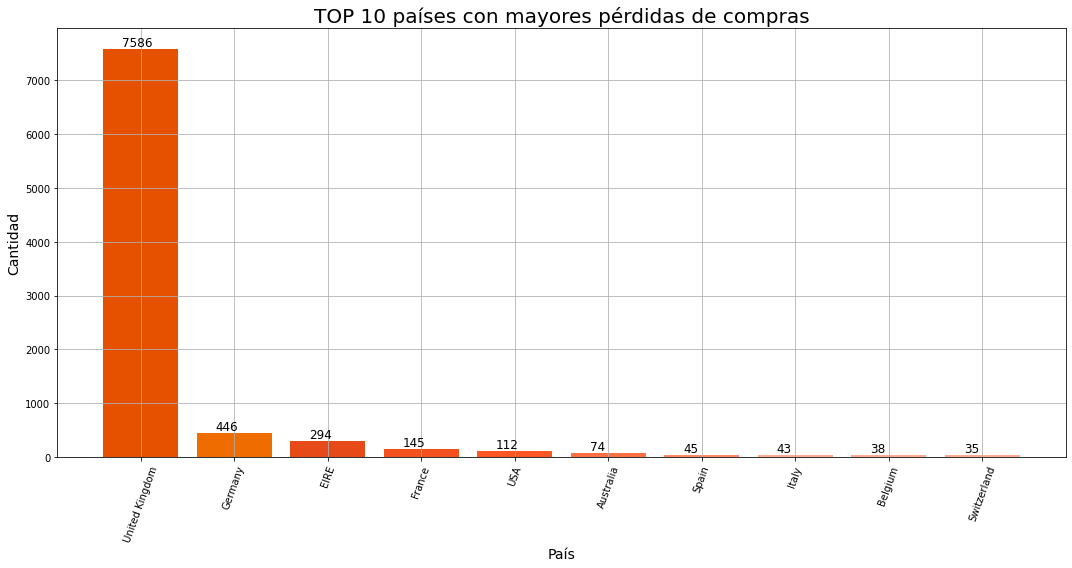

In [228]:
df_paisesC = df_cancelados.groupby("Country").agg({
    "Description": "count"
})
df_paisesC = df_paisesC.sort_values("Description", ascending = False).head(10)
color_palet = ["#E65100", "#EF6C00", "#E64A19", "#F4511E", "#FF5722", "#FF7043", "#FF8A65", "#FFAB91", "#FFAB91", "#FFAB91"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(df_paisesC.index, df_paisesC["Description"], color = color_palet)
plt.xticks(rotation = 70)
plt.xlabel("País", fontsize = 14)
plt.ylabel("Cantidad", fontsize = 14)
plt.title("TOP 10 países con mayores pérdidas de compras", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_paisesC["Description"]):
    plt.text(x = index-0.2, y = data + 50, s = data, fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

_Comentarios: se puede apreciar que el mayor volumen de devoluciones están en el país de Reino Unido, lo cual no impresiona debido a que la sede de la comercializadora está ubicada en dicho país. Omitiendo ese país, se puede apreciar que Alemania concentra con gran volumen de productos devueltos, por lo que sería bueno analizar qué productos son y ver si existe alguna posibilidad de obtener el motivo de la devolución, para realizar un análisis similar al anterior._